In [1]:
import sys
import os
# Add "mitsuba" library path to the system path

# Import mitsuba and set the variant
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

# Import the mitsuba-transient extension
# adds extra functionality to existing Mitsuba classes
import mitransient as mitr

[mitsuba] Warning: Couldn't import the ipywidgets package. Installing this package is required for the system to properly log messages and print in Jupyter notebooks!


In [2]:
# Load XML file
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
scene = mi.load_file(os.path.abspath('simple/simple_angular_1light.xml'))


# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=1000)

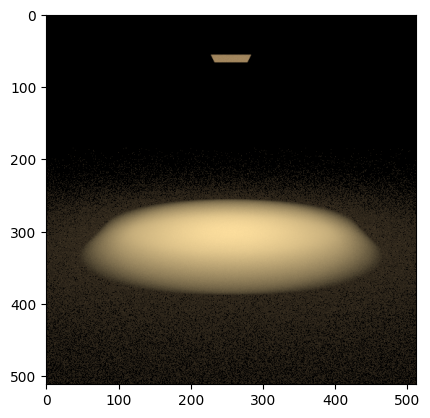

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

In [4]:
mitr.vis.show_video(
    (data_transient / np.max(data_transient)) ** (1 / 4.0),
    axis_video=2,
)

In [5]:
scene = mi.load_file(os.path.abspath('simple/simple_angular_1light.xml'))
params = mi.traverse(scene)

params['sensor.to_world'] = params['sensor.to_world'].look_at(
    mi.ScalarPoint3f(0, 50, 10),  # origin
    mi.ScalarPoint3f(0, 0, 30),      # target
    mi.ScalarPoint3f(0, 0, 1)    # up
)
params.update()

# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=64)

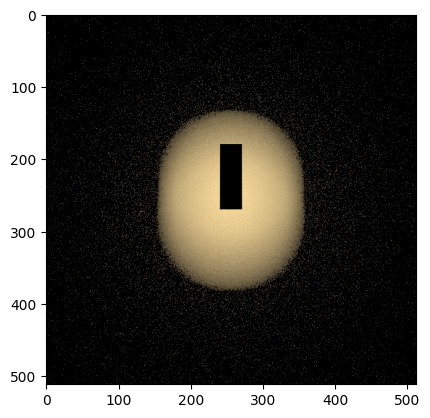

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

In [7]:
mitr.vis.show_video(
    (data_transient / np.max(data_transient)) ** (1 / 4.0),
    axis_video=2,
)